link to original (anotated) script: https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Preparation

In [6]:
df1 = pd.read_csv("datasets/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1.shape

(13320, 9)

In [11]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [24]:
df1.groupby('area_type').agg({'area_type': 'count'})

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [27]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
#df2.describe()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [36]:
df2.isnull().sum(axis='rows') # axis argument is optional, would be the same outout without it

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [86]:
df3 = df2.dropna() 
#df3.isnull().sum()
df3.shape

(13246, 5)

In [87]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [88]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))

<ipython-input-88-40dad9573774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))


In [89]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [90]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [91]:
df3[df3['bhk']>20]
#df3[df3.bhk>20] #Equivalent to the line above

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [92]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [93]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [94]:
def average_sqft(x):
    try:
        low_range = float(x.split()[0])
        high_range = float(x.split()[2])
        average = np.mean([low_range, high_range])
        return average
    except:
        return None

In [95]:
mask = df3['total_sqft'].apply(is_float)
df3[~mask]['total_sqft']

<ipython-input-95-042cca7bee08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'][~mask] = df3['total_sqft'][~mask].apply(average_sqft)
C:\Programs\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [96]:
df3['total_sqft'][~mask] = df3['total_sqft'][~mask].apply(average_sqft)
df3[~mask].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2475,4.0,186.000,4
122,Hebbal,4 BHK,5611.5,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1073.5,2.0,54.005,2
165,Sarjapur,2 BHK,1242.5,2.0,43.490,2
188,KR Puram,2 BHK,1277.5,2.0,56.800,2
410,Kengeri,1 BHK,NaN,1.0,18.500,1
549,Hennur Road,2 BHK,1317.5,2.0,63.770,2
648,Arekere,9 Bedroom,NaN,9.0,265.000,9
661,Yelahanka,2 BHK,1132.5,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,4046,4.0,445.000,4


In [104]:
df5 = df3.copy()
df5['total_sqft'] = df5['total_sqft'].astype(float)
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: price_per_sqft, dtype: float64

In [107]:
len(df5.location.unique())

1304

In [112]:
#df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [113]:
len(location_stats[location_stats <= 10])

1052

In [114]:
locations_stats_less_than_10 = location_stats[location_stats <= 10]
locations_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [118]:
df5.location = df5.location.apply(lambda x: 'other' if x in locations_stats_less_than_10 else x)
len(df5.location.unique())

242

In [120]:
df5.location.head(15)

0     Electronic City Phase II
1             Chikka Tirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
5                   Whitefield
6             Old Airport Road
7                 Rajaji Nagar
8                 Marathahalli
9                        other
10                  Whitefield
11                  Whitefield
12          7th Phase JP Nagar
13                   Gottigere
14                    Sarjapur
Name: location, dtype: object

In [123]:
df5[(df5.total_sqft/df5.bhk)<300].describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,744.000000,744.000000,744.000000,744.000000,7.440000e+02
mean,971.224462,4.840054,130.495054,5.342742,3.491305e+04
std,452.337485,2.717266,81.466194,2.620347,4.486481e+05
min,1.000000,1.000000,8.000000,1.000000,2.045455e+03
25%,600.000000,3.000000,77.750000,4.000000,9.430544e+03
50%,942.500000,4.000000,110.000000,5.000000,1.250000e+04
75%,1200.000000,6.000000,165.000000,6.000000,1.625000e+04
max,8000.000000,40.000000,675.000000,43.000000,1.200000e+07


In [122]:
df5.shape

(13246, 7)

In [127]:
df6 = df5[~((df5.total_sqft/df5.bhk)<300)]
df6.shape

(12502, 7)

In [128]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:ylabel='Frequency'>

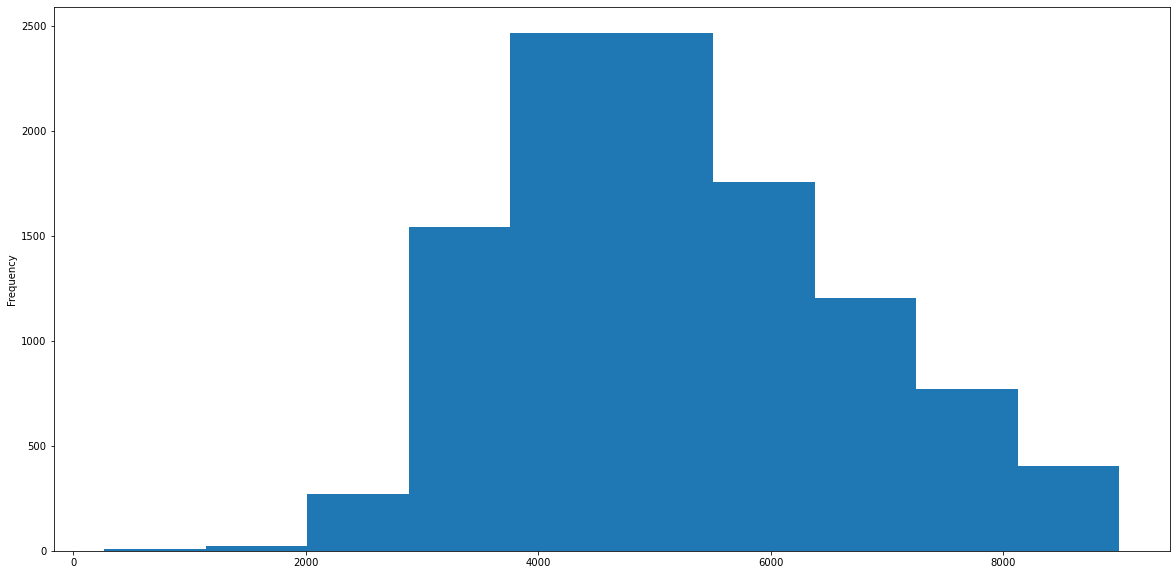

In [137]:
#df6.price_per_sqft.plot.hist()
df6[(df6['price_per_sqft']<9000)]['price_per_sqft'].plot.hist()

In [142]:
# This function removes apartments which have a price_per_sqft is more than 1 standard deviation above or below the mean per location

def remove_ppsqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        standard_div = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-standard_div)) & (subdf.price_per_sqft<=(mean+standard_div))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [143]:
df7 = remove_ppsqft_outliers(df6)
df7.shape

(10241, 7)

In [149]:
# This function removes apartments whose price_per_sqft is larger than the mean price_per_sqft of apartments with 1 less room in the same location

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [150]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

Text(0, 0.5, 'Count')

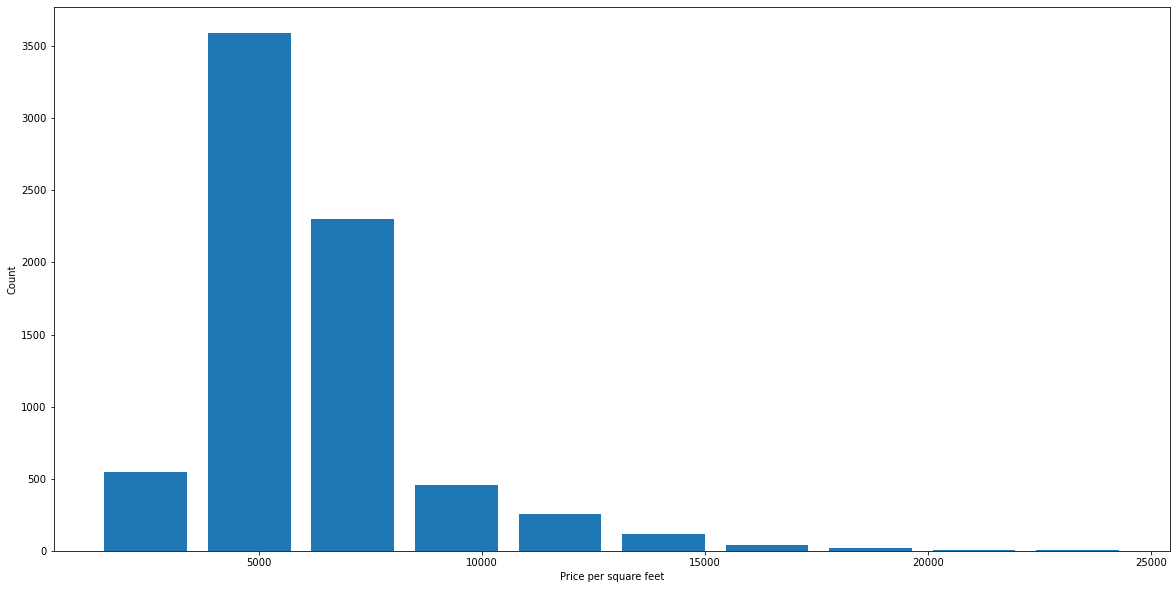

In [152]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [165]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [166]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


<AxesSubplot:ylabel='Frequency'>

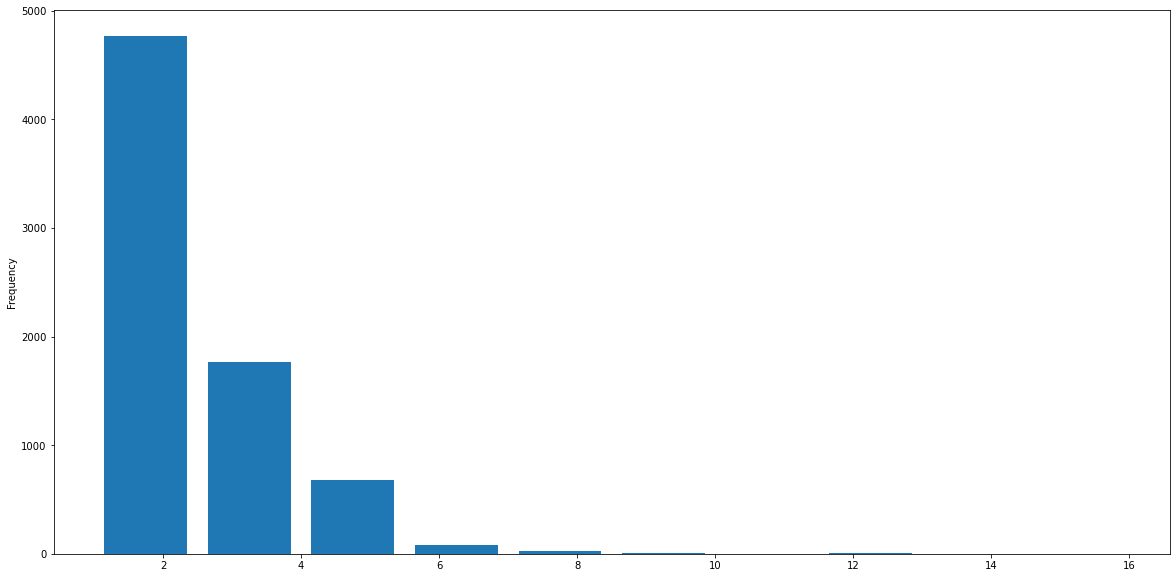

In [159]:
df8['bath'].plot.hist(rwidth=0.8)

In [167]:
# Remove apartments which have № of bathrooms greater the № of bedrooms + 2

#df8[df8['bath']>(df8['bhk']+2)]
mask = df8['bath']<(df8['bhk']+2) # this should be <= as it would be normal to have the same number of baths as bedrooms but I am keeping it this way to be the same as the tutorial

df9 = df8[mask]
df9.shape

(7251, 7)

In [168]:
df9.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [173]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [174]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns') # other will be our reference category
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
df12.shape

(7251, 245)

# Modelling

In [179]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [183]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() # lr_clf is abbreviation for linearRegression_classifier
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874278

In [202]:
#lr_clf.intercept_ # gets the intercept
#lr_clf.coef_ # gets the coefficients for each feature
#lr_clf.score(X_train, y_train) # we get a different R2 when we score it on the train set
lr_clf.score(X, y) # and a different R2 when we score it on all the data

0.8541850010771193

In [198]:
# getting the named coefficients with dict comprehension
features = list(X.columns)
coefficients = list(lr_clf.coef_)
named_coefficients = {features[i]: coefficients[i] for i in range(len(features))}
named_coefficients

{'total_sqft': 0.07941537392443081,
 'bath': 5.079024944512794,
 'bhk': -1.7728777642470845,
 '1st Block Jayanagar': 120.1026836079061,
 '1st Phase JP Nagar': 1.609751311664752,
 '2nd Phase Judicial Layout': -53.16321913918685,
 '2nd Stage Nagarbhavi': 100.74470901990432,
 '5th Block Hbr Layout': -70.98149330012978,
 '5th Phase JP Nagar': -39.21595424647559,
 '6th Phase JP Nagar': -19.01728514037446,
 '7th Phase JP Nagar': -18.657090253870646,
 '8th Phase JP Nagar': -47.859708585629136,
 '9th Phase JP Nagar': -45.80726840808923,
 'AECS Layout': -36.31031834844076,
 'Abbigere': -53.71884390830042,
 'Akshaya Nagar': -43.201493277550384,
 'Ambalipura': -28.33344558394132,
 'Ambedkar Nagar': -30.9802726708115,
 'Amruthahalli': -34.134998327941574,
 'Anandapura': -43.55421642743196,
 'Ananth Nagar': -46.85574954664794,
 'Anekal': -35.544384309151624,
 'Anjanapura': -51.34133220938104,
 'Ardendale': -44.11613217244372,
 'Arekere': -33.91073912965313,
 'Attibele': -35.09945824849143,
 'BEML L

In [199]:
# getting the named coefficients with zip()

features = list(X.columns)
coefficients = list(lr_clf.coef_)
named_coefficients = dict(zip(features, coefficients))
named_coefficients

{'total_sqft': 0.07941537392443081,
 'bath': 5.079024944512794,
 'bhk': -1.7728777642470845,
 '1st Block Jayanagar': 120.1026836079061,
 '1st Phase JP Nagar': 1.609751311664752,
 '2nd Phase Judicial Layout': -53.16321913918685,
 '2nd Stage Nagarbhavi': 100.74470901990432,
 '5th Block Hbr Layout': -70.98149330012978,
 '5th Phase JP Nagar': -39.21595424647559,
 '6th Phase JP Nagar': -19.01728514037446,
 '7th Phase JP Nagar': -18.657090253870646,
 '8th Phase JP Nagar': -47.859708585629136,
 '9th Phase JP Nagar': -45.80726840808923,
 'AECS Layout': -36.31031834844076,
 'Abbigere': -53.71884390830042,
 'Akshaya Nagar': -43.201493277550384,
 'Ambalipura': -28.33344558394132,
 'Ambedkar Nagar': -30.9802726708115,
 'Amruthahalli': -34.134998327941574,
 'Anandapura': -43.55421642743196,
 'Ananth Nagar': -46.85574954664794,
 'Anekal': -35.544384309151624,
 'Anjanapura': -51.34133220938104,
 'Ardendale': -44.11613217244372,
 'Arekere': -33.91073912965313,
 'Attibele': -35.09945824849143,
 'BEML L

In [207]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [210]:
# Finding the best model and parameters with GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687442,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721871,"{'criterion': 'mse', 'splitter': 'best'}"


In [211]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [212]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677167729

In [220]:
predict_price('1st Phase JP Nagar',1000, 3, 1)

90.35094948043717

In [217]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484007027

In [216]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033597

In [221]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [230]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))